In [1]:
import pandas as pd
import numpy as np

laws_and_policies = pd.read_excel('datasets/laws_and_policies_AGRI.xlsx')
laws_and_policies['Count'] = 1

laws_and_policies['agricultur_law'] = np.where((laws_and_policies['sector_agriculture']==0) & (laws_and_policies['count_matches']==0), 0,1)
laws_and_policies['agricultur_law_yes'] = np.where((laws_and_policies['sector_agriculture']==0) & (laws_and_policies['count_matches']==0), "no", "yes")
laws_and_policies.columns = laws_and_policies.columns.str.replace(' ', '_')
laws_and_policies.Count.sum()

1880

In [2]:
pd.set_option('display.max_columns', None)
laws_and_policies.head(10)

,Unnamed:_0,Title,Type,Geography,Geography_ISO,Frameworks,Responses,Instruments,Document_Types,Natural_Hazards,Keywords,Sectors,Events,Documents,Parent_Legislation,Description,sector_agriculture,sector_LULUCF,sector_agriculture_LULUCF,matches,count_matches,EU_country,First,Second,Third,Fourth,First_date,First_year,After_2004,Count,agricultur_law,agricultur_law_yes
0,1176,Climate Change Response (Zero Carbon) Amendmen...,legislative,New Zealand,NZL,Mitigation,NaN,Standards and obligations|Regulation;Taxes|Inc...,Law,NaN,"Institutions / Administrative Arrangements, Ca...","Waste, Transportation, LULUCF, Economy-wide, A...",18/11/2002|Law passed||;25/12/2014|Last amendm...,Climate Change Response (Zero Carbon) Amendmen...,NaN,<div>The Climate Change Response Act 2002 esta...,1,1,1,"'forestry', 'agriculture'",15,0,18/11/2002|Law passed||,25/12/2014|Last amendment||,01/11/2019|Amended by the Climate Change Respo...,22/06/2020|Amended by the Emissions Trading Re...,18/11/2002,2002,0,1,1,yes
1,1131,Myanmar Climate-Smart Agriculture Strategy,executive,Myanmar,MMR,NaN,"Adaptation, Disaster Risk Management",NaN,Strategy,NaN,"Adaptation, Institutions / Administrative Arra...","Water, Transportation, LULUCF, Energy, Agricul...",01/09/2015|Law passed,Full text|https://climate-laws.org/rails/activ...,NaN,The Climate-Smart Agriculture Strategy (CSA) h...,1,1,1,"'agricultural', 'farming', 'agriculture', 'cul...",13,0,01/09/2015|Law passed,NaN,NaN,NaN,01/09/2015,2015,1,1,1,yes
2,883,Agriculture (Farm Forestry) Rules 2009,executive,Kenya,KEN,NaN,NaN,NaN,Regulation/Rules,NaN,Redd+ And Lulucf,"Environment, Water, LULUCF, Agriculture",25/12/2009|Law passed,link to text via webpage|http://kenyalaw.org/k...,NaN,<div><br><br>&nbsp;<br>&nbsp;The Agriculture F...,1,1,1,"'forestry', 'agricultural', 'agriculture'",10,0,25/12/2009|Law passed,NaN,NaN,NaN,25/12/2009,2009,1,1,1,yes
3,975,National Strategy to Face Climate Change in Ag...,executive,Madagascar,MDG,NaN,Adaptation,NaN,Strategy,NaN,"Adaptation, Institutions / Administrative Arra...",Agriculture,25/12/2013|Law passed,Full text|https://climate-laws.org/rails/activ...,NaN,"The Ministries of Agriculture, Livestock and F...",1,0,1,"'fishing', 'farming', 'agriculture'",9,0,25/12/2013|Law passed,NaN,NaN,NaN,25/12/2013,2013,1,1,1,yes
4,240,Agricultural Land Protection Act,legislative,Bulgaria,BGR,NaN,NaN,NaN,Law,NaN,Redd+ And Lulucf,"Waste, LULUCF, Agriculture",24/04/1996|Law passed;28/11/2014|Last amended,NaN,NaN,The Agricultural Land Protection Act allows la...,1,1,1,"'agricultural', 'agriculture'",9,1,24/04/1996|Law passed,28/11/2014|Last amended,NaN,NaN,24/04/1996,1996,0,1,1,yes
5,1258,Amended Law no. 2/2003 on Agriculture,legislative,Palestine,PSE,NaN,"Adaptation, Disaster Risk Management",NaN,Law,NaN,"Adaptation, Institutions / Administrative Arra...","Environment, LULUCF, Agriculture",25/12/2003|Law passed,NaN,NaN,The law no 2 of 2003 aims at enabling the sust...,1,1,1,"'forestry', 'agricultural'",9,0,25/12/2003|Law passed,NaN,NaN,NaN,25/12/2003,2003,0,1,1,yes
6,1540,"Framework Act on Agriculture, Rural Community ...",legislative,South Korea,KOR,NaN,"Adaptation, Disaster Risk Management",NaN,Law,NaN,"Adaptation, Institutions / Administrative Arra...","Water, Energy, Agriculture",22/06/2015|Law passed;25/12/2017|Last amendment,Full text (PDF)|https://climate-laws.org/rails...,NaN,This act outlines a general framework for the ...,1,0,1,"'forestry', 'agricultural', 'agriculture'",9,0,22/06/2015|Law passed,25/12/2017|Last amendment,NaN,NaN,22/06/2015,2015,1,1,1,yes
7,533,"Land Use, Land Use Change and Forestry (LULUCF...",legislative,European Union,EUR,NaN,NaN,NaN,Eu Decision,NaN,"Institutions / Administrative Arrangements, Re...","Environment, Water, Transportation, LULUCF, Ag...",08/07/2013|Law passed,NaN,NaN,Harmonisation of accounting rules for emission...,1,1,1,"'forestry', 'agricultural', 'agriculture'",8,1,08/07/2013|Law passed,NaN,NaN,NaN,08/07/2013,2013,1,1,1,yes
8,1021,The National Agricultur

In [3]:
laws_and_policies.columns

Index(['Unnamed:_0', 'Title', 'Type', 'Geography', 'Geography_ISO',
       'Frameworks', 'Responses', 'Instruments', 'Document_Types',
       'Natural_Hazards', 'Keywords', 'Sectors', 'Events', 'Documents',
       'Parent_Legislation', 'Description', 'sector_agriculture',
       'sector_LULUCF', 'sector_agriculture_LULUCF', 'matches',
       'count_matches', 'EU_country', 'First', 'Second', 'Third', 'Fourth',
       'First_date', 'First_year', 'After_2004', 'Count', 'agricultur_law',
       'agricultur_law_yes'],
      dtype='object')

# Inspecting the cases with agriculture in description but not in Sector
LULCF = land use, land change and forestry

In [4]:
# SECTORS: agriculture + LULUCF
laws_and_policies['agricultur_not_sector_but_match'] = np.where((laws_and_policies['sector_agriculture']==0) & (laws_and_policies['count_matches']==1), 1,0)
laws_and_policies_subset=laws_and_policies[laws_and_policies["agricultur_not_sector_but_match"]>0] 
laws_and_policies_subset=laws_and_policies_subset[laws_and_policies_subset["EU_country"]>0]
laws_and_policies_subset=laws_and_policies_subset[laws_and_policies_subset["After_2004"]>0]
laws_and_policies_subset=laws_and_policies_subset.sort_values(by=['agricultur_not_sector_but_match'], ascending=False)
print(laws_and_policies_subset.agricultur_not_sector_but_match.sum())
#laws_and_policies_subset.head(100)

9


In [5]:
# laws_and_policies_subset.Sectors.unique()

In [6]:
# SECTORS: only agriculture
laws_and_policies['agricultur_LULUCF_not_sector_but_match'] = np.where((laws_and_policies['sector_agriculture_LULUCF']==0) & (laws_and_policies['count_matches']==1), 1,0)
laws_and_policies_subset=laws_and_policies[laws_and_policies["agricultur_LULUCF_not_sector_but_match"]>0] 
laws_and_policies_subset=laws_and_policies_subset[laws_and_policies_subset["EU_country"]>0]
laws_and_policies_subset=laws_and_policies_subset[laws_and_policies_subset["After_2004"]>0]
laws_and_policies_subset=laws_and_policies_subset.sort_values(by=['agricultur_LULUCF_not_sector_but_match'], ascending=False)
print(laws_and_policies_subset.agricultur_LULUCF_not_sector_but_match.sum())

5


In [7]:
laws_and_policies_subset.Sectors.unique()

array(['Water, Transportation, Tourism, Energy, Economy-wide, Residential and Commercial',
       nan, 'Transportation',
       'Waste, Transportation, Energy, Residential and Commercial'],
      dtype=object)

In [8]:
laws_and_policies_subset.sort_values('Geography', ascending=False).to_excel('datasets/laws_and_policies_AGRI_not_Sector.xlsx')
laws_and_policies_subset.head(100)

,Unnamed:_0,Title,Type,Geography,Geography_ISO,Frameworks,Responses,Instruments,Document_Types,Natural_Hazards,Keywords,Sectors,Events,Documents,Parent_Legislation,Description,sector_agriculture,sector_LULUCF,sector_agriculture_LULUCF,matches,count_matches,EU_country,First,Second,Third,Fourth,First_date,First_year,After_2004,Count,agricultur_law,agricultur_law_yes,agricultur_not_sector_but_match,agricultur_LULUCF_not_sector_but_match
209,1556,"Royal Decree 635/2013, developing the 'Plan to...",executive,Spain,ESP,NaN,NaN,NaN,Decree/Order/Ordinance,NaN,"Institutions / Administrative Arrangements, Ca...","Water, Transportation, Tourism, Energy, Econom...",02/08/2013|Law passed,Full text|https://climate-laws.org/rails/activ...,NaN,The Plan (PIMA SOL) is an initiative to reduce...,0,0,0,'agriculture',1,1,02/08/2013|Law passed,NaN,NaN,NaN,02/08/2013,2013,1,1,1,yes,1,1
210,1583,Royal Decree No. 6/2018 - Creates the Intermin...,executive,Spain,ESP,NaN,"Adaptation, Mitigation",NaN,Decree,NaN,"Adaptation, Institutions / Administrative Arra...",NaN,22/01/2018|Law passed,Royal Decree No. 6/2018|https://climate-laws.o...,NaN,This Royal Decree creates the Inter-ministeria...,0,0,0,'agriculture',1,1,22/01/2018|Law passed,NaN,NaN,NaN,22/01/2018,2018,1,1,1,yes,1,1
211,1580,Royal Decree creating the Interministerial Com...,executive,Spain,ESP,NaN,NaN,NaN,Decree/Order/Ordinance,NaN,Institutions / Administrative Arrangements,NaN,30/12/2011|Law passed,Full text|http://www.mapama.gob.es/es/cambio-c...,NaN,"Royal Decree 1886/2011, which establishes the ...",0,0,0,'agriculture',1,1,30/12/2011|Law passed,NaN,NaN,NaN,30/12/2011,2011,1,1,1,yes,1,1
217,1559,Law 2/2013 on the protection and sustainable u...,legislative,Spain,ESP,NaN,Adaptation,NaN,Law,NaN,"Adaptation, Institutions / Administrative Arra...",Transportation,29/05/2013|Law passed,Full text|https://climate-laws.org/rails/activ...,NaN,This Law incorporates regulations to tackle th...,0,0,0,'agriculture',1,1,29/05/2013|Law passed,NaN,NaN,NaN,29/05/2013,2013,1,1,1,yes,1,1
286,618,Action Programme on Climate Protection 2020,executive,Germany,DEU,Mitigation,Mitigation,Developing plans and strategies|Governance and...,Programme,NaN,"Energy Supply, Energy Demand, Redd+ And Lulucf...","Waste, Transportation, Energy, Residential and...",03/12/2014|Law passed||,NaN,NaN,<div>Published by the Federal Ministry for the...,0,0,0,'agriculture',1,1,03/12/2014|Law passed||,NaN,NaN,NaN,03/12/2014,2014,1,1,1,yes,1,1


In [22]:
del laws_and_policies['agricultur_not_sector_but_match']
del laws_and_policies['agricultur_LULUCF_not_sector_but_match']

# categorising the Document_Types

In [9]:
# print(laws_and_policies.Type.unique())
# print(laws_and_policies.Document_Types.unique())

### individual types
'Law'
'Policy'
'Strategy'
'Resolution' (Resolution = Beschluss, Entschluss, Ratschluss)
'Act'
'Policy'
'Programme',
'Framework'
'Directive' (directive = Anordnung, Richtlinie)
'Out Of Date' 
'Constitution'

'Regulation', 'Regulation/Rules','Rules'
'Plan', 'Action Plan'
'Decree', 'Decree/Order/Ordinance', 'Decree Law', 'Royal Decree' (decree = Erlass / Verordnung / Urteil)
'Eu Decision','Eu Regulation','Eu Directive'
'Road Map/Vision', 'Road Map/Vision/Agenda', 'Radmap' 

nan 

In [10]:
laws_and_policies_types=laws_and_policies[['Unnamed:_0','Geography','Type','Document_Types','First_year','agricultur_law','agricultur_law_yes','Count','EU_country','After_2004']].copy()
laws_and_policies_types=laws_and_policies_types[laws_and_policies_types["EU_country"]>0]
laws_and_policies_types=laws_and_policies_types[laws_and_policies_types["After_2004"]>0]
del laws_and_policies_types['EU_country']
del laws_and_policies_types['After_2004']
print('Total')
print(laws_and_policies_types.Count.sum())

# Law
laws_and_policies_types['Law'] = laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Law' in str(x) else 0))
print('Law')
print(laws_and_policies_types.Law.sum())

# Policy
laws_and_policies_types['Policy'] = laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Policy' in str(x) else 0))
print('Policy')
print(laws_and_policies_types.Policy.sum())

# Strategy
laws_and_policies_types['Strategy'] = laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Strategy' in str(x) else 0))
print('Strategy')
print(laws_and_policies_types.Strategy.sum())

# Resolution
laws_and_policies_types['Resolution'] = laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Resolution' in str(x) else 0))
print('Resolution')
print(laws_and_policies_types.Resolution.sum())

# Act
laws_and_policies_types['Act'] = laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Act' in str(x) else 0))
print('Act')
print(laws_and_policies_types.Act.sum())

# Programme
laws_and_policies_types['Programme'] = laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Programme' in str(x) else 0))
print('Programme')
print(laws_and_policies_types.Programme.sum())

# Framework
laws_and_policies_types['Framework'] = laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Framework' in str(x) else 0))
print('Framework')
print(laws_and_policies_types.Framework.sum())

# Directive
laws_and_policies_types['Directive'] = laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Directive' in str(x) else 0))
print('Directive')
print(laws_and_policies_types.Directive.sum())

# Out Of Date
laws_and_policies_types['Out_Of_Date'] = laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Out Of Date' in str(x) else 0))
print('Out of Date')
print(laws_and_policies_types.Out_Of_Date.sum())

# Constitution
laws_and_policies_types['Constitution'] = laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Constitution' in str(x) else 0))
print('Constitution')
print(laws_and_policies_types.Constitution.sum())

# Plan
laws_and_policies_types['Plan'] = laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Plan' in str(x) else 0))
print('Plan')
print(laws_and_policies_types.Plan.sum())

# Decree
laws_and_policies_types['Decree'] = laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Decree' in str(x) else 0))
print('Decree')
print(laws_and_policies_types.Decree.sum())

# EU_Decision_Regulation
laws_and_policies_types['EU_Decision_Regulation'] = laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Eu' in str(x) else 0))
print('EU Decision and Regulation')
print(laws_and_policies_types.EU_Decision_Regulation.sum())

# Road_map 'Road Map/Vision', 'Road Map/Vision/Agenda', 'Radmap'
laws_and_policies_types['Road_map'] = laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Map' in str(x) else 0))
laws_and_policies_types['radmap']=laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Radmap' in str(x) else 0))
laws_and_policies_types['Road_map'] = laws_and_policies_types['Road_map'] + laws_and_policies_types['radmap']
laws_and_policies_types['Road_map'] = np.where((laws_and_policies_types['Road_map']>0),1,0)
del laws_and_policies_types['radmap']
print('Road map')
print(laws_and_policies_types.Road_map.sum())

# Regulations / Rules
laws_and_policies_types['Regulation_Rules'] = laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Regulation' in str(x) else 0))
laws_and_policies_types['Rules']=laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'Rules' in str(x) else 0))
laws_and_policies_types['Regulation_Rules'] = laws_and_policies_types['Regulation_Rules'] + laws_and_policies_types['Rules']
laws_and_policies_types['Regulation_Rules'] = np.where((laws_and_policies_types['Regulation_Rules']>0),1,0)
del laws_and_policies_types['Rules']
print('Regulation / Rules')
print(laws_and_policies_types.Regulation_Rules.sum())

# no type
laws_and_policies_types['no_type'] = laws_and_policies_types.Document_Types.apply(lambda x: (1 if 'nan' in str(x) else 0))
print('no_type')
print(laws_and_policies_types.no_type.sum())

del laws_and_policies_types['Document_Types']

Total
372
Law
176
Policy
27
Strategy
38
Resolution
9
Act
17
Programme
14
Framework
2
Directive
12
Out of Date
1
Constitution
0
Plan
33
Decree
58
EU Decision and Regulation
27
Road map
1
Regulation / Rules
15
no_type
37


In [11]:
# laws_and_policies_types.head(10)

In [12]:
laws_and_policies_types_long = (pd.melt(laws_and_policies_types, id_vars = ['Unnamed:_0','Geography','Type','First_year','agricultur_law','agricultur_law_yes','Count'], value_name = 'Type_Document'))
laws_and_policies_types_long=laws_and_policies_types_long[laws_and_policies_types_long["Type_Document"]>0]
del laws_and_policies_types_long['Type_Document']
# laws_and_policies_types_long.sort_values('First_year', ascending=False).to_excel('datasets/laws_and_policies_document_type_AGRI.xlsx')
laws_and_policies_types_long.head(200)

,Unnamed:_0,Geography,Type,First_year,agricultur_law,agricultur_law_yes,Count,variable
3,581,France,legislative,2014,1,yes,1,Law
5,708,Hungary,legislative,2011,1,yes,1,Law
10,816,Italy,legislative,2010,1,yes,1,Law
11,1617,Sweden,legislative,2009,1,yes,1,Law
15,967,Luxembourg,legislative,2018,1,yes,1,Law
...,...,...,...,...,...,...,...,...
612,781,Ireland,executive,2015,0,no,1,Policy
613,780,Ireland,executive,2018,0,no,1,Policy
615,818,Italy,executive,2005,0,no,1,Policy
644,773,Ireland,executive,2007,0,no,1,Policy


Text(0.5, 1.0, 'Types of Document per country')

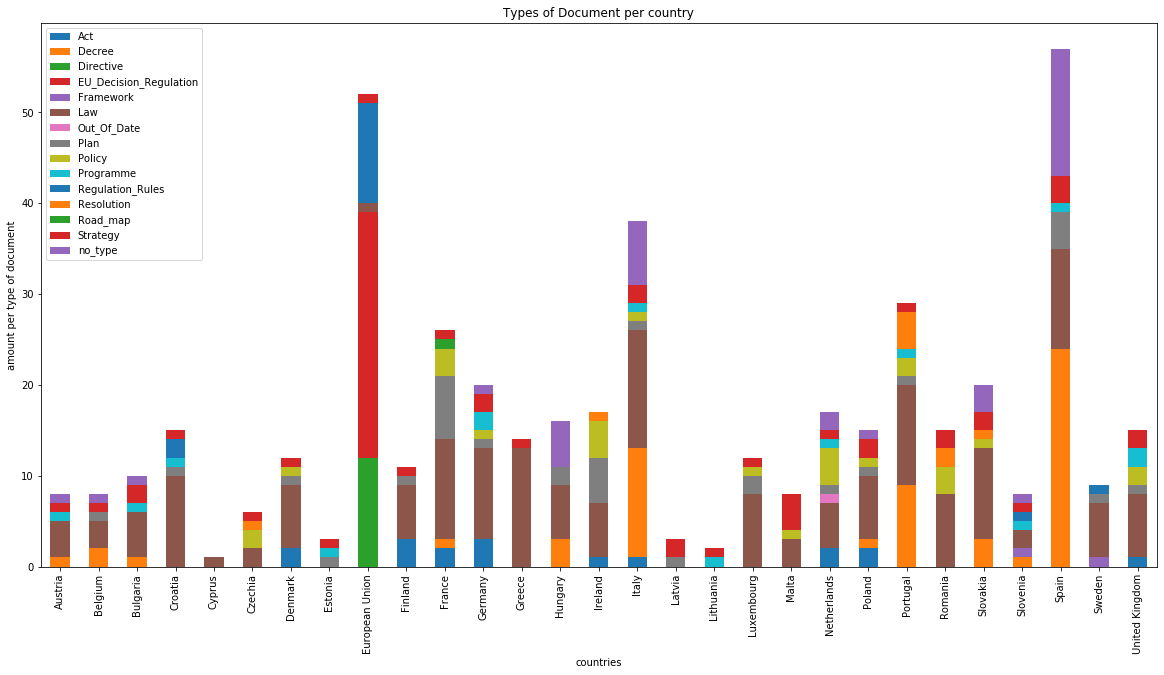

In [13]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams

rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

laws_and_policies_types_long.groupby(['Geography','variable']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel('countries')
plt.ylabel('amount per type of document')
L=plt.legend()
plt.title('Types of Document per country')

Text(0.5, 1.0, 'Types of Document per year')

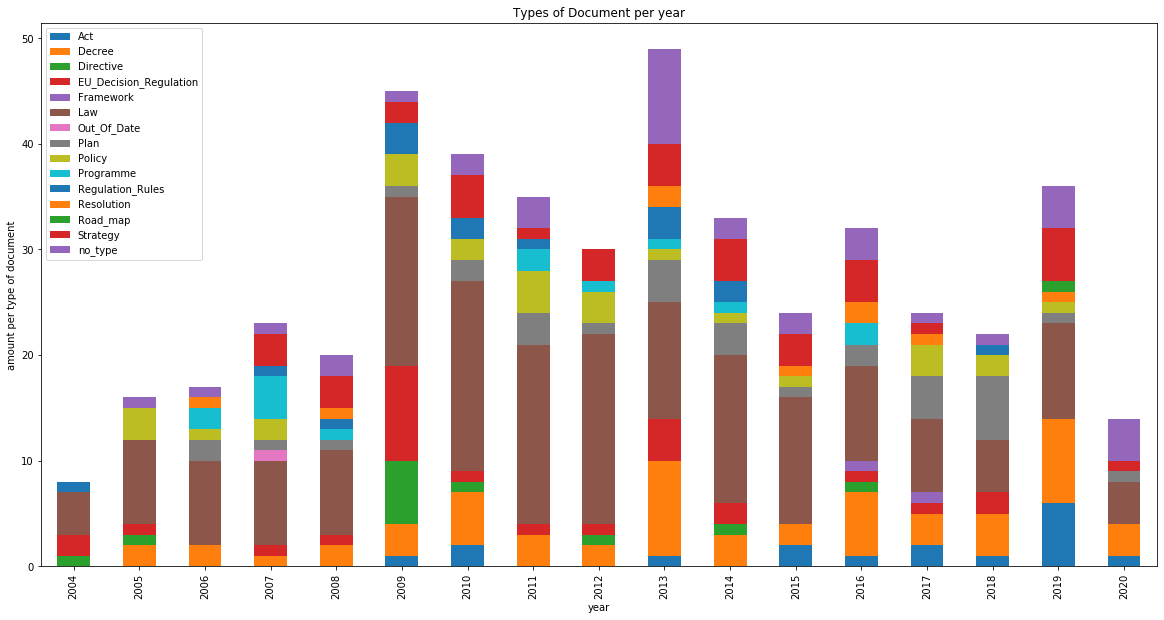

In [14]:
rcParams['figure.figsize'] = 20,10 # changes the dimensions of the plot (width, height)

laws_and_policies_types_long.groupby(['First_year','variable']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel('year')
plt.ylabel('amount per type of document')
L=plt.legend()
plt.title('Types of Document per year')

Text(0.5, 1.0, 'Types of Document per agriculture and other law')

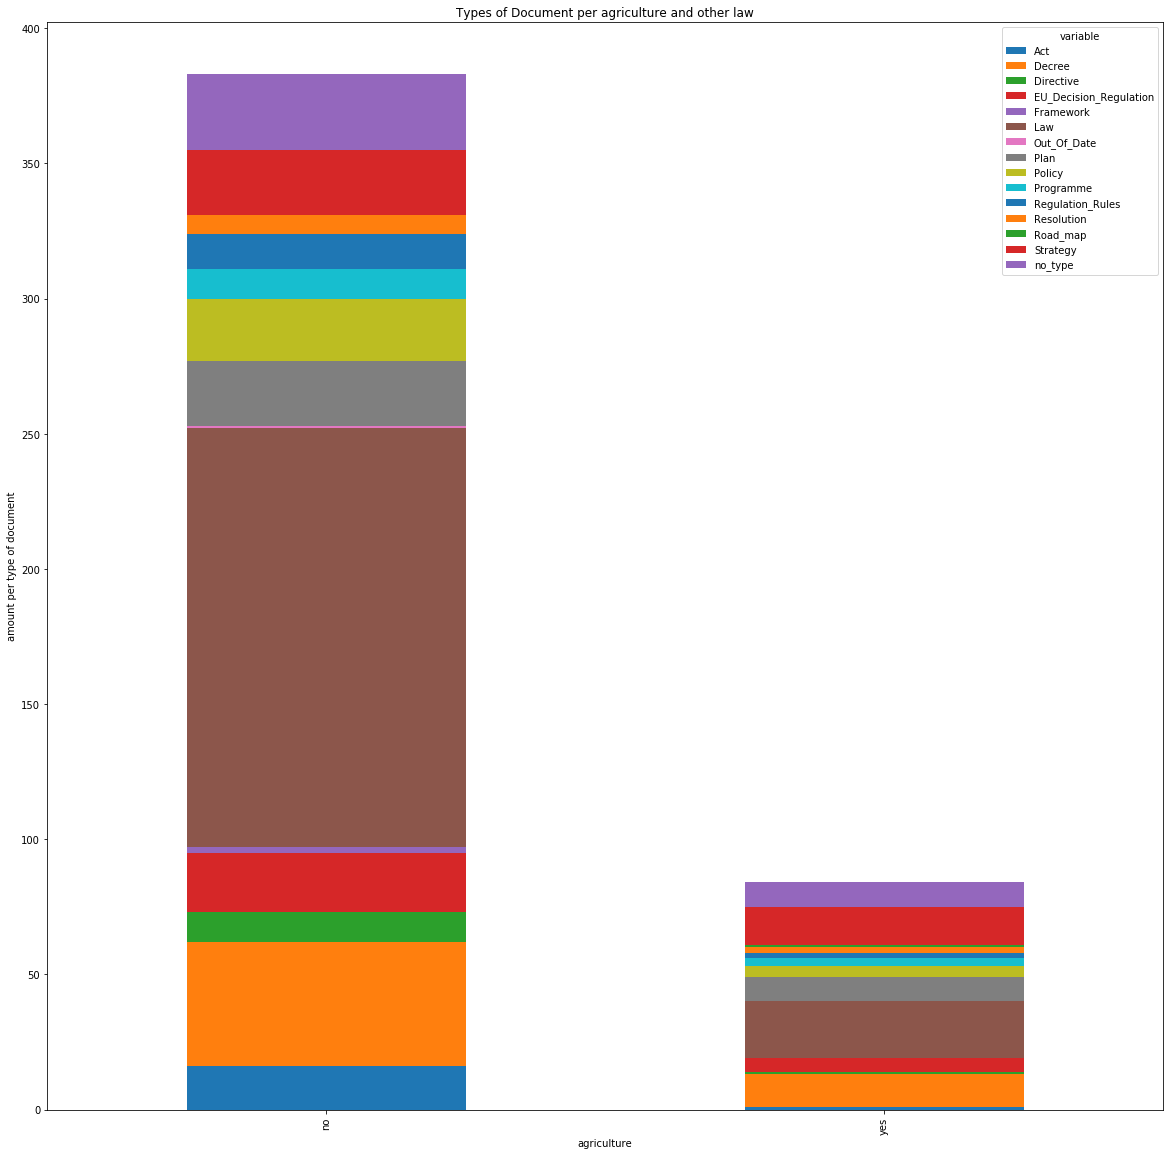

In [15]:
rcParams['figure.figsize'] = 20, 20 # changes the dimensions of the plot (width, height)

laws_and_policies_types_long.groupby(['agricultur_law_yes','variable']).size().unstack().plot(kind='bar',stacked=True)

plt.xlabel('agriculture')
plt.ylabel('amount per type of document')
plt.title('Types of Document per agriculture and other law')

### hard law & soft law

In [43]:
# preparation
from flashtext import KeywordProcessor
def extract(vec, dictionary, info=False):
    matrix = []
    for line in vec:
        matrix.append(dictionary.extract_keywords(str(line), span_info=info))
    return matrix

# extracting hard law
terms = ['Law', 'Resolution','Act', 'Directive', 'Constitution', 'Regulation', 'Regulation/Rules', 'Rules', 'Decree', 'Decree/Order/Ordinance', 'Decree Law', 'Royal Decree', 'Eu Decision','Eu Regulation','Eu Directive']
terms_dict = KeywordProcessor()
terms_dict.add_keywords_from_list(terms)
terms_extracted = extract(laws_and_policies.Document_Types, terms_dict)
rows = [list(set(i)) if len(i)>0 else '' for i in terms_extracted]
laws_and_policies['hard_law'] = [str(i).replace('[', '').replace(']', '') for i in rows]
laws_and_policies['count_matches_hard_law'] = [len(i) for i in terms_extracted]
laws_and_policies['law_type'] = np.where((laws_and_policies['count_matches_hard_law']==0), "soft_law","hard_law")
# del laws_and_policies['hard_law']
# del laws_and_policies['count_matches_hard_law']

# extracting soft law
terms = ['Policy', 'Resolution','Strategy', 'Programme', 'Framework', 'Plan', 'Action Plan', 'Road Map/Vision', 'Road Map/Vision/Agenda', 'Radmap', 'Out Of Date']
terms_dict = KeywordProcessor()
terms_dict.add_keywords_from_list(terms)
terms_extracted = extract(laws_and_policies.Document_Types, terms_dict)
rows = [list(set(i)) if len(i)>0 else '' for i in terms_extracted]
laws_and_policies['Soft_law/policy/other'] = [str(i).replace('[', '').replace(']', '') for i in rows]
laws_and_policies['count_matches_Soft_law/policy/other'] = [len(i) for i in terms_extracted]
laws_and_policies['law_type2'] = np.where((laws_and_policies['count_matches_Soft_law/policy/other']==0),"hard_law", "soft_law")
#

In [35]:
laws_and_policies.head(4)

,Unnamed:_0,Title,Type,Geography,Geography_ISO,Frameworks,Responses,Instruments,Document_Types,Natural_Hazards,Keywords,Sectors,Events,Documents,Parent_Legislation,Description,sector_agriculture,sector_LULUCF,sector_agriculture_LULUCF,matches,count_matches,EU_country,First,Second,Third,Fourth,First_date,First_year,After_2004,Count,agricultur_law,agricultur_law_yes,hard_law,count_matches_hard_law,law_type,Soft law/policy/other,count_matches_Soft law/policy/other,law_type2,Soft_law/policy/other,count_matches_Soft_law/policy/other
0,1176,Climate Change Response (Zero Carbon) Amendmen...,legislative,New Zealand,NZL,Mitigation,NaN,Standards and obligations|Regulation;Taxes|Inc...,Law,NaN,"Institutions / Administrative Arrangements, Ca...","Waste, Transportation, LULUCF, Economy-wide, A...",18/11/2002|Law passed||;25/12/2014|Last amendm...,Climate Change Response (Zero Carbon) Amendmen...,NaN,<div>The Climate Change Response Act 2002 esta...,1,1,1,"'forestry', 'agriculture'",15,0,18/11/2002|Law passed||,25/12/2014|Last amendment||,01/11/2019|Amended by the Climate Change Respo...,22/06/2020|Amended by the Emissions Trading Re...,18/11/2002,2002,0,1,1,yes,'Law',1,hard_law,,0,hard_law,,0
1,1131,Myanmar Climate-Smart Agriculture Strategy,executive,Myanmar,MMR,NaN,"Adaptation, Disaster Risk Management",NaN,Strategy,NaN,"Adaptation, Institutions / Administrative Arra...","Water, Transportation, LULUCF, Energy, Agricul...",01/09/2015|Law passed,Full text|https://climate-laws.org/rails/activ...,NaN,The Climate-Smart Agriculture Strategy (CSA) h...,1,1,1,"'agricultural', 'farming', 'agriculture', 'cul...",13,0,01/09/2015|Law passed,NaN,NaN,NaN,01/09/2015,2015,1,1,1,yes,,0,soft_law,'Strategy',1,soft_law,'Strategy',1
2,883,Agriculture (Farm Forestry) Rules 2009,executive,Kenya,KEN,NaN,NaN,NaN,Regulation/Rules,NaN,Redd+ And Lulucf,"Environment, Water, LULUCF, Agriculture",25/12/2009|Law passed,link to text via webpage|http://kenyalaw.org/k...,NaN,<div><br><br>&nbsp;<br>&nbsp;The Agriculture F...,1,1,1,"'forestry', 'agricultural', 'agriculture'",10,0,25/12/2009|Law passed,NaN,NaN,NaN,25/12/2009,2009,1,1,1,yes,'Regulation/Rules',1,hard_law,,0,hard_law,,0
3,975,National Strategy to Face Climate Change in Ag...,executive,Madagascar,MDG,NaN,Adaptation,NaN,Strategy,NaN,"Adaptation, Institutions / Administrative Arra...",Agriculture,25/12/2013|Law passed,Full text|https://climate-laws.org/rails/activ...,NaN,"The Ministries of Agriculture, Livestock and F...",1,0,1,"'fishing', 'farming', 'agriculture'",9,0,25/12/2013|Law passed,NaN,NaN,NaN,25/12/2013,2013,1,1,1,yes,,0,soft_law,'Strategy',1,soft_law,'Strategy',1


In [44]:
test_data=laws_and_policies[['Document_Types','hard_law', 'Soft_law/policy/other', 'count_matches_hard_law', 'count_matches_Soft_law/policy/other', 'law_type','law_type2']].copy()


test_data=test_data[test_data["count_matches_hard_law"]<1]
test_data=test_data[test_data["count_matches_Soft_law/policy/other"]<1]

test_data.head(100)

,Document_Types,hard_law,Soft_law/policy/other,count_matches_hard_law,count_matches_Soft_law/policy/other,law_type,law_type2
248,NaN,,,0,0,soft_law,hard_law
584,NaN,,,0,0,soft_law,hard_law
692,NaN,,,0,0,soft_law,hard_law
1172,NaN,,,0,0,soft_law,hard_law
1199,NaN,,,0,0,soft_law,hard_law
1701,NaN,,,0,0,soft_law,hard_law
1829,NaN,,,0,0,soft_law,hard_law
1857,NaN,,,0,0,soft_law,hard_law


# Adjusting the dataset
#### Type of policies

In [ ]:
# laws_and_policies['Sectors'].head(10)


In [ ]:
# turns the sectors into individual columns (not ordered)
# laws_and_policies[['Sector_1','Sector_2','Sector_3','Sector_4','Sector_5','Sector_6','Sector_7','Sector_8','Sector_9','Sector_10','Sector_11','Sector_12']]=laws_and_policies.Sectors.str.split(",",expand=True)

#### Dates and status of the policy

In [ ]:
# splitting the Events colum

# laws_and_policies[['First','Second','Third','Fourth']]=laws_and_policies.Events.str.split(";",expand=True)

# laws_and_policies['First_date']=laws_and_policies['First'].str.slice(stop=10)
# laws_and_policies['First_status']=laws_and_policies['First'].str.slice(start=11)
# laws_and_policies['First_year']=laws_and_policies['First_date'].str.slice(start=6)

# laws_and_policies['Second_date']=laws_and_policies['Second'].str.slice(stop=10)
# laws_and_policies['Second_status']=laws_and_policies['Second'].str.slice(start=11)
# laws_and_policies['Second_year']=laws_and_policies['Second_date'].str.slice(start=6)

# laws_and_policies['Third_date']=laws_and_policies['Third'].str.slice(stop=10)
# laws_and_policies['Third_status']=laws_and_policies['Third'].str.slice(start=11)
# laws_and_policies['Third_year']=laws_and_policies['Third_date'].str.slice(start=6)

# laws_and_policies['Fourth_date']=laws_and_policies['Fourth'].str.slice(stop=10)
# laws_and_policies['Fourth_status']=laws_and_policies['Fourth'].str.slice(start=11)
# laws_and_policies['Fourth_year']=laws_and_policies['Fourth_date'].str.slice(start=6)

# laws_and_policies.head(100)

# # checking the extracted values
# laws_and_policies.First_year.unique() 
# laws_and_policies.Second_year.unique() 
# laws_and_policies.Third_year.unique() 
# laws_and_policies.Fourth_year.unique() 

In [ ]:
laws_and_policies.head(4)

# Subset the data to only include EU countries with laws as from 2004

In [ ]:
laws_and_policies=laws_and_policies[laws_and_policies["EU_country"]>0]
laws_and_policies=laws_and_policies[laws_and_policies["After_2004"]>0]
laws_and_policies.Count.sum()

# Plots
## laws per country

In [ ]:
# pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams

#### Dataset "Geography"

In [ ]:
# dataset aggregated to country level
Geography=laws_and_policies.groupby('Geography').sum() # aggregate the data by country
Geography['countries'] = Geography.index # add rownames as columns
Geography['countries_with_agricultur_law'] = np.where((Geography['agricultur_law']>0), 1, 0)

# subset dataset with only agriculture laws
Geography_subset=Geography[Geography["agricultur_law"]>0] 
Geography_subset=Geography_subset.sort_values(by=['agricultur_law'], ascending=False)

Geography.head(10)

#### laws per country (all laws)

In [ ]:
Geography=Geography.sort_values(by=['Count'], ascending=False)

rcParams['figure.figsize'] = 80, 20 # changes the dimensions of the plot (width, height)

# plot 
x_units =(Geography['countries'].to_list()) # change column to list to use it for the plot
y_units = (Geography['Count'].to_list()) # change column to list to use it for the plot
plt.xticks(rotation=90) # rotates the lables of the x axis for better readability

plt.bar(x_units,y_units, width = 0.8)
plt.xlabel('countries', fontsize = 20)
plt.ylabel('number of laws', fontsize = 20)
plt.title('Number of laws per country', fontsize = 50)

# plt.tight_layout()
# plt.show()

#plt.savefig('Graphics/Laws_per_country.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot 


#### laws per country (only agriculture)

In [ ]:
rcParams['figure.figsize'] = 80, 20 # changes the dimensions of the plot (width, height)

# plot 
x_units =(Geography_subset['countries'].to_list()) # change column to list to use it for the plot
y_units = (Geography_subset['agricultur_law'].to_list()) # change column to list to use it for the plot
plt.xticks(rotation=90) # rotates the lables of the x axis for better readability

plt.bar(x_units,y_units, width = 0.8)
plt.xlabel('countries', fontsize = 20)
plt.ylabel('number of laws', fontsize = 20)
plt.title('Number of agriculture laws per country', fontsize = 50)

# plt.tight_layout()
# plt.show()

#plt.savefig('Graphics/Laws_agriculture_per_country.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


#### all laws + agricultural laws per country combined

In [ ]:
rcParams['figure.figsize'] = 80, 20 # changes the dimensions of the plot (width, height)

laws_and_policies.groupby(['Geography','agricultur_law_yes']).size().unstack().plot(kind='bar',stacked=True)

plt.xlabel('countries', fontsize = 20)
plt.ylabel('number of laws', fontsize = 20)
plt.title('Number of agriculture and other laws per country', fontsize = 50)

#plt.savefig('Graphics/Laws_divided_per_country.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


#### countries with agriculture laws

In [ ]:
# subsetting the Geography dataset
Division=Geography[['countries_with_agricultur_law','agricultur_law']].copy()
Division['number_countries'] = 1

# creating the with / without column for the x-axis grouping
Division=Division.groupby('countries_with_agricultur_law').sum()
bins=[-10,1,np.inf]
names=['without','with']
Division['groups']=pd.cut(Division['agricultur_law'],bins, labels = names)

# setting the size of the figure
rcParams['figure.figsize'] = 5, 5 # changes the dimensions of the plot (width, height)

# plot 
x_units =(Division['groups'].to_list()) # change column to list to use it for the plot
y_units = (Division['number_countries'].to_list()) # change column to list to use it for the plot

plt.bar(x_units,y_units, width = 0.8)
plt.xlabel('agricultural laws')
plt.ylabel('number of countries')
plt.title('Countries with agriculture laws')

# saving the file
#plt.savefig('Graphics/ration_countries_with_agriculture_laws.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


#### agricultural laws out of all laws ( 1 = agriculture law)

In [ ]:
rcParams['figure.figsize'] = 5, 5 # changes the dimensions of the plot (width, height)

laws_and_policies.groupby(['agricultur_law','Count']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel('agricultural laws')
plt.ylabel('number of laws')
L=plt.legend()
plt.xticks((0,1), ("no","yes"))
plt.title('Total number of agriculture and other laws')


#plt.savefig('Graphics/ratio_agricultural_laws.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


# laws per year

#### all laws + agricultural laws per year (ABSOLUT VALUES)

In [ ]:
rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

laws_and_policies.groupby(['First_year','agricultur_law_yes']).size().unstack().plot(kind='bar',stacked=True)

plt.xlabel('year', fontsize = 20)
plt.ylabel('number of laws', fontsize = 20)
L=plt.legend()
L.get_texts()[0].set_text('other laws')
L.get_texts()[1].set_text('agriculture laws')
plt.title('Number of agriculture and other laws per year', fontsize = 40)

plt.savefig('Graphics/Laws_total_divided_per_year_absolut.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


#### all laws + agricultural laws per year (PERCENTAGES)

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

# laws_and_policies['policy_type'] = laws_and_policies['agricultur_law'].astype(str)
# laws_and_policies['policy_type'] = laws_and_policies['policy_type'].replace(str(0),'not including agriculture')
# laws_and_policies['policy_type'] = laws_and_policies['policy_type'].replace(str(1),'including agriculture')

rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

laws_and_policies.groupby(['First_year','agricultur_law_yes']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.xlabel('year', fontsize = 20)
plt.ylabel('percentage of laws', fontsize = 20)
L=plt.legend()
L.get_texts()[0].set_text('other laws')
L.get_texts()[1].set_text('agriculture laws')
plt.title('Percentage of agriculture and other laws per year', fontsize = 40)


plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig('Graphics/Laws_total_divided_per_year_percentage.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot

In [ ]:
# aggregate
Percentage = laws_and_policies[['First_year', 'Count', 'agricultur_law']].copy()
Percentage=Percentage.groupby('First_year').sum() # aggregate the data by country
Percentage['agriculture_law_percentage'] = (Percentage['agricultur_law'] / Percentage ['Count']) * 100
Percentage['other_law_percentage'] = 100 - Percentage['agriculture_law_percentage']

# add percentage change
AgriLaw = Percentage['agricultur_law'].tolist()
AgriLaw
agriculture_law_percentage_change = []
for x in range(1, len(AgriLaw), 1):
    val_1 = AgriLaw[x-1]
    if val_1 == 0.0: #Check if val_1 is 0.
        agriculture_law_percentage_change.append('nan')
    else:
        val_2 = AgriLaw[x]
        diff = int(round((float(val_2)/val_1)*100)) # change to float -->round--> int
        agriculture_law_percentage_change.append(diff)
agriculture_law_percentage_change.insert(0,'nan')
    
Percentage['agriculture_law_percentage_change'] = agriculture_law_percentage_change

Percentage.head(30)

# Sector

In [ ]:
laws_and_policies.head()

In [ ]:
# laws_and_policies.Sectors.unique()

Agriculture
Buildings
Coastal zones
Economy-wide
Energy
Environment
Health
Industry
LULUCF
Rural
Residential and Commercial
Social development
Tourism
Transportation
Urban
Waste
Water

nan

In [ ]:
laws_and_policies_sectors=laws_and_policies[['Unnamed:_0','Geography','Sectors','First_year','agricultur_law','agricultur_law_yes','Count','EU_country','After_2004']].copy()
laws_and_policies_sectors=laws_and_policies_sectors[laws_and_policies_sectors["EU_country"]>0]
laws_and_policies_sectors=laws_and_policies_sectors[laws_and_policies_sectors["After_2004"]>0]
del laws_and_policies_sectors['EU_country']
del laws_and_policies_sectors['After_2004']
print('Total')
print(laws_and_policies_sectors.Count.sum())

# Agriculture
laws_and_policies_sectors['Agriculture'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'Agriculture' in str(x) else 0))
print('Agriculture')
print(laws_and_policies_sectors.Agriculture.sum())

# Buildings
laws_and_policies_sectors['Buildings'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'Buildings' in str(x) else 0))
print('Buildings')
print(laws_and_policies_sectors.Buildings.sum())

# Coastal zones
laws_and_policies_sectors['Coastal_zones'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'Coastal zones' in str(x) else 0))
print('Coastal_zones')
print(laws_and_policies_sectors.Coastal_zones.sum())

# Economy-wide
laws_and_policies_sectors['Economy_wide'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'Economy-wide' in str(x) else 0))
print('Economy_wide')
print(laws_and_policies_sectors.Economy_wide.sum())

# Energy
laws_and_policies_sectors['Energy'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'Energy' in str(x) else 0))
print('Energy')
print(laws_and_policies_sectors.Energy.sum())

# Environment
laws_and_policies_sectors['Environment'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'Environment' in str(x) else 0))
print('Environment')
print(laws_and_policies_sectors.Environment.sum())

# Health
laws_and_policies_sectors['Health'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'Health' in str(x) else 0))
print('Health')
print(laws_and_policies_sectors.Health.sum())

# Industry
laws_and_policies_sectors['Industry'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'Industry' in str(x) else 0))
print('Industry')
print(laws_and_policies_sectors.Industry.sum())

# LULUCF
laws_and_policies_sectors['LULUCF'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'LULUCF' in str(x) else 0))
print('LULUCF')
print(laws_and_policies_sectors.LULUCF.sum())

# Rural
laws_and_policies_sectors['Rural'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'Rural' in str(x) else 0))
print('Rural')
print(laws_and_policies_sectors.Rural.sum())

# Residential and Commercial
laws_and_policies_sectors['Residential_and_Commercial'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'Residential and Commercial' in str(x) else 0))
print('Residential_and_Commercial')
print(laws_and_policies_sectors.Residential_and_Commercial.sum())

# Tourism
laws_and_policies_sectors['Tourism'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'Tourism' in str(x) else 0))
print('Tourism')
print(laws_and_policies_sectors.Tourism.sum())

# Transportation
laws_and_policies_sectors['Transportation'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'Transportation' in str(x) else 0))
print('Transportation')
print(laws_and_policies_sectors.Transportation.sum())

# Urban
laws_and_policies_sectors['Urban'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'Urban' in str(x) else 0))
print('Urban')
print(laws_and_policies_sectors.Urban.sum())

# Waste
laws_and_policies_sectors['Waste'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'Waste' in str(x) else 0))
print('Waste')
print(laws_and_policies_sectors.Waste.sum())

# Water
laws_and_policies_sectors['Water'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'Water' in str(x) else 0))
print('Water')
print(laws_and_policies_sectors.Water.sum())

# no type
laws_and_policies_sectors['no_sector'] = laws_and_policies_sectors.Sectors.apply(lambda x: (1 if 'nan' in str(x) else 0))
print('no_sector')
print(laws_and_policies_sectors.no_sector.sum())

del laws_and_policies_sectors['Sectors']

In [ ]:
laws_and_policies_sectors_long = (pd.melt(laws_and_policies_sectors, id_vars = ['Unnamed:_0','Geography','First_year','agricultur_law','agricultur_law_yes','Count'], value_name = 'Sectors'))
laws_and_policies_sectors_long=laws_and_policies_sectors_long[laws_and_policies_sectors_long["Sectors"]>0]
del laws_and_policies_sectors_long['Sectors']
# laws_and_policies_types_long.sort_values('First_year', ascending=False).to_excel('datasets/laws_and_policies_document_type_AGRI.xlsx')
laws_and_policies_sectors_long.head(200)

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams

rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

laws_and_policies_sectors_long.groupby(['Geography','variable']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel('countries')
plt.ylabel('amount per Sector')
L=plt.legend()
plt.title('Sectors per country')

In [ ]:
rcParams['figure.figsize'] = 20,10 # changes the dimensions of the plot (width, height)

laws_and_policies_sectors_long.groupby(['First_year','variable']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel('year')
plt.ylabel('amount per year')
L=plt.legend()
plt.title('Sectors per year')

In [ ]:
rcParams['figure.figsize'] = 20, 20 # changes the dimensions of the plot (width, height)

laws_and_policies_sectors_long.groupby(['agricultur_law_yes','variable']).size().unstack().plot(kind='bar',stacked=True)

plt.xlabel('agriculture')
plt.ylabel('amount per sector')
plt.title('Sector per agriculture and other law')